<a href="https://colab.research.google.com/github/ZeyadZanaty/offenseval/blob/master/offenseval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning to download classes

In [1]:
'''
!git clone https://github.com/ZeyadZanaty/offenseval.git
%cd offenseval
%matplotlib inline
'''

'\n!git clone https://github.com/ZeyadZanaty/offenseval.git\n%cd offenseval\n%matplotlib inline\n'

## Imports

In [2]:
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'averaged_perceptron_tagger', 'averaged_perceptron_tagger_eng', 'punkt_tab'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claradelandre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/claradelandre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/claradelandre/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/claradelandre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/claradelandre/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/claradelandre/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date

True

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from DataReader import DataReader
print("Vectorizer")
from Vectorizer import Vectorizer
print("classifier")
from Classifier import Classifier
print("deeplearning")
from DeepLearning import DeepLearner
print("preprocessor")
from Preprocessor import Preprocessor
print("sklearn")
from sklearn.model_selection import train_test_split as split
print("numpy")
import numpy as np

Vectorizer
classifier
deeplearning
preprocessor
sklearn
numpy


# Subtask A

## Reading data and splitting

In [5]:
dr = DataReader('./datasets/training-v1/offenseval-training-v1.tsv', 'A')
data, labels = dr.get_labelled_data()
data, labels = dr.shuffle(data, labels, 'random')

# Split dataset into training and testing sets
tr_data, tst_data, tr_labels, tst_labels = split(data, labels, test_size=0.3)


Reading Data: 13241it [00:00, 297846.62it/s]


## Initializing objects

In [6]:
preprocessors = [('lemmatize'), ('remove_stopwords', 'lemmatize'),
                 ('remove_stopwords', 'stem'), ('remove_stopwords', 'lemmatize'),
                 ('remove_stopwords', 'lemmatize'), ('remove_stopwords')]

vectorizers = ['count', 'count', 'count', 'tfidf', 'glove']

classifiers = [('RandomForest', {'n_estimators': 30}),
               ('LogisticRegression', {'penalty': 'l2', 'solver': 'sag'}),
               ('M-NaiveBayes', {'alpha': 5, 'fit_prior': True}),
               ('KNN', {'n_neighbors': 5}),
               ('SVC', {'C': 10, 'kernel': 'rbf'})]

# Prepare preprocessors, vectorizers, and classifiers
for i in range(len(vectorizers)):
    preprocessors[i] = Preprocessor(preprocessors[i])
    vectorizers[i] = Vectorizer(vectorizers[i])
    classifiers[i] = Classifier(*classifiers[i])

## Training classifiers

In [7]:
tst_vecs = []
tr_vecs = []
for i in range(len(classifiers)):
  tr_data_clean = preprocessors[i].clean(tr_data)
  tst_data_clean = preprocessors[i].clean(tst_data)
  
  tr_vecs.append(vectorizers[i].vectorize(tr_data_clean))
  tst_vecs.append(vectorizers[i].vectorize(tst_data_clean))
  
  classifiers[i].fit(tr_vecs[i], tr_labels)

Tokenization: 9268it [00:01, 6471.61it/s]0<?, ?it/s]
Lemmatization: 9268it [00:11, 814.84it/s] <00:01,  1.44s/it]
Preprocessing: 100%|██████████| 2/2 [00:12<00:00,  6.41s/it]
Tokenization: 3972it [00:00, 6857.18it/s]0<?, ?it/s]
Lemmatization: 3972it [00:03, 1022.71it/s]<00:00,  1.72it/s]
Preprocessing: 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]
Tokenization: 9268it [00:01, 6831.73it/s]0<?, ?it/s]
Stopwords Removal: 9268it [00:00, 79808.51it/s]2,  1.36s/it]
Lemmatization: 9268it [00:04, 2034.57it/s]<00:00,  1.59it/s]
Preprocessing: 100%|██████████| 3/3 [00:06<00:00,  2.01s/it]
Tokenization: 3972it [00:00, 6866.03it/s]0<?, ?it/s]
Stopwords Removal: 3972it [00:00, 81313.21it/s]1,  1.73it/s]
Lemmatization: 3972it [00:01, 2082.22it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
/Users/claradelandre/opt/anaconda3/envs/offenseval/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge


Loading Glove Embeddings from api...
[==================================================] 100.0% 387.1/387.1MB downloaded


Finalizing: 100%|██████████| 9268/9268 [00:02<00:00, 3485.64it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 3972/3972 [00:01<00:00, 3497.32it/s]


## Testing and plotting

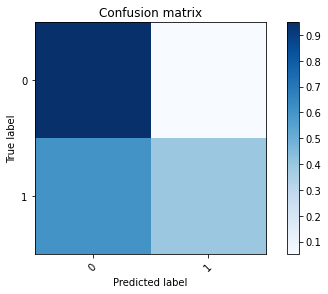

Accuracy: 0.7615810674723061, Classifier: ABCMeta, Params: {'n_estimators': 30}


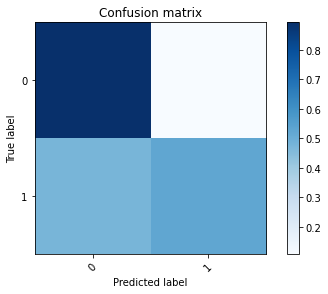

Accuracy: 0.7696374622356495, Classifier: type, Params: {'penalty': 'l2', 'solver': 'sag'}


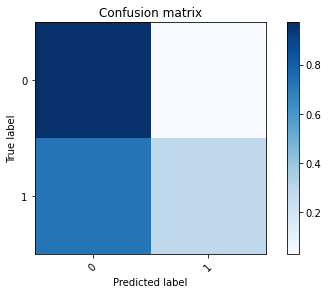

Accuracy: 0.7411883182275931, Classifier: ABCMeta, Params: {'alpha': 5, 'fit_prior': True}


/Users/claradelandre/opt/anaconda3/envs/offenseval/lib/python3.8/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


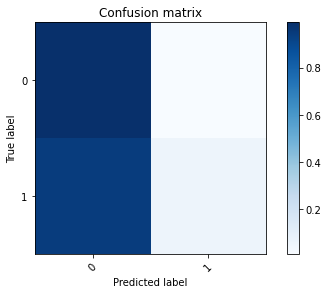

Accuracy: 0.6764853977844915, Classifier: ABCMeta, Params: {'n_neighbors': 5}


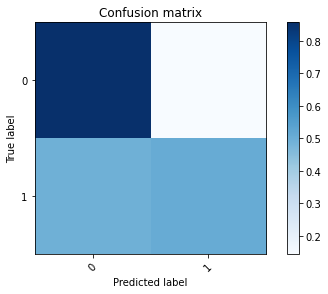

Accuracy: 0.7391742195367573, Classifier: ABCMeta, Params: {'C': 10, 'kernel': 'rbf'}


[0.7615810674723061,
 0.7696374622356495,
 0.7411883182275931,
 0.6764853977844915,
 0.7391742195367573]

In [8]:
accs = []
for i, clf in enumerate(classifiers):
    acc = clf.test_and_plot(tst_vecs[i], tst_labels, class_num=2)
    print(f"Accuracy: {acc}, Classifier: {clf.classifier.__class__.__name__}, Params: {clf.params}")
    accs.append(acc)

accs

# Subtask B

## Reading data and splitting

In [9]:
dr_b = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','B')
data_b,labels_b = dr_b.get_labelled_data()
data_b,labels_b = dr_b.shuffle(data_b,labels_b,'random')

tr_data_b,tst_data_b,tr_labels_b,tst_labels_b = split(data_b,labels_b,test_size=0.3)

Reading Data: 13241it [00:00, 325434.97it/s]


## Initializing objects

In [10]:
preprocessors_b = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers_b = ['count','count','count','tfidf','glove']

classifiers_b = [('RandomForest',{'n_estimators':30}),
               ('LogisticRegression',{'penalty':'l2','solver':'sag'}),
              ('M-NaiveBayes',{'alpha':5,'fit_prior':True}),
              ('KNN',{'n_neighbors':5}),('SVC',{'C':10,'kernel':'rbf'})]

for i in range(len(vectorizers_b)):
  preprocessors_b[i] = Preprocessor(preprocessors_b[i])
  vectorizers_b[i] = Vectorizer(vectorizers_b[i])
  classifiers_b[i] = Classifier(*classifiers_b[i])

## Training classifiers

In [11]:
tst_vecs_b = []
tr_vecs_b = []
for i in range(len(classifiers_b)):
  tr_data_clean_b = preprocessors_b[i].clean(tr_data_b)
  tst_data_clean_b = preprocessors_b[i].clean(tst_data_b)
  
  tr_vecs_b.append(vectorizers_b[i].vectorize(tr_data_clean_b))
  tst_vecs_b.append(vectorizers_b[i].vectorize(tst_data_clean_b))
  
  classifiers_b[i].fit(tr_vecs_b[i],tr_labels_b)

Tokenization: 3080it [00:00, 6084.04it/s]0<?, ?it/s]
Lemmatization: 3080it [00:03, 996.21it/s] <00:00,  1.97it/s]
Preprocessing: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]
Tokenization: 1320it [00:00, 6625.84it/s]0<?, ?it/s]
Lemmatization: 1320it [00:01, 1034.31it/s]<00:00,  4.99it/s]
Preprocessing: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]
Tokenization: 3080it [00:00, 6001.03it/s]0<?, ?it/s]
Stopwords Removal: 3080it [00:00, 76940.46it/s]1,  1.94it/s]
Lemmatization: 3080it [00:01, 1671.59it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]
Tokenization: 1320it [00:00, 6092.70it/s]0<?, ?it/s]
Stopwords Removal: 1320it [00:00, 73933.11it/s]0,  4.59it/s]
Lemmatization: 1320it [00:00, 1758.19it/s]
Preprocessing: 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]
/Users/claradelandre/opt/anaconda3/envs/offenseval/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 3080/3080 [00:00<00:00, 4307.87it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 1320/1320 [00:00<00:00, 4222.80it/s]


## Testing and plotting

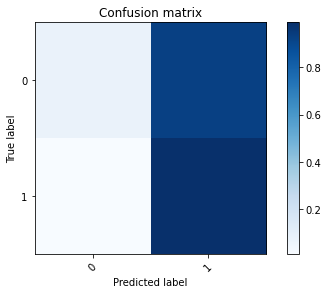

0.8856060606060606 RandomForestClassifier {'n_estimators': 30}


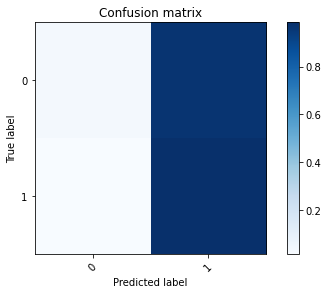

0.8757575757575757 LogisticRegression {'penalty': 'l2', 'solver': 'sag'}


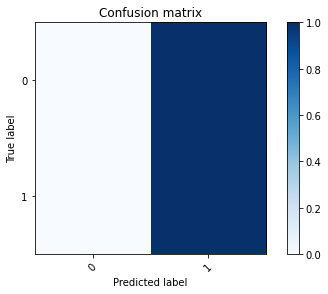

0.8856060606060606 MultinomialNB {'alpha': 5, 'fit_prior': True}


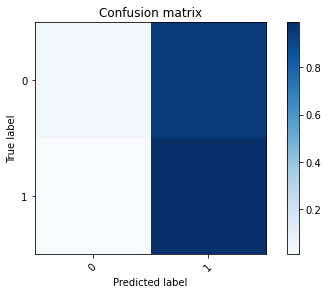

0.8810606060606061 KNeighborsClassifier {'n_neighbors': 5}


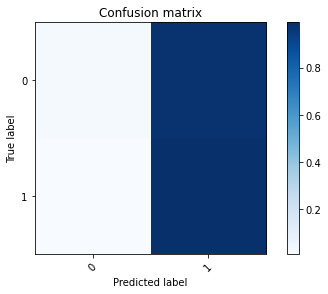

0.8810606060606061 SVC {'C': 10, 'kernel': 'rbf'}


[0.8856060606060606,
 0.8757575757575757,
 0.8856060606060606,
 0.8810606060606061,
 0.8810606060606061]

In [12]:
accs_b = []
for i,clf in enumerate(classifiers_b):
  acc = clf.test_and_plot(tst_vecs_b[i],tst_labels_b,class_num=2)
  print(acc,clf.classifier.__name__,clf.params)
  accs_b.append(acc)
  
accs_b

# Subtask C

## Reading data and splitting

In [13]:
dr_c = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','C')
data_c,labels_c = dr_c.get_labelled_data()
data_c,labels_c = dr_c.shuffle(data_c,labels_c,'random')

tr_data_c,tst_data_c,tr_labels_c,tst_labels_c = split(data_c,labels_c,test_size=0.3)

Reading Data: 13241it [00:00, 320690.03it/s]


## Initializing objects

In [14]:
preprocessors_c = [('lemmatize'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','stem'),('remove_stopwords','lemmatize'),
        ('remove_stopwords','lemmatize'),('remove_stopwords')]

vectorizers_c = ['count','count','count','tfidf','glove']

classifiers_c = [('RandomForest',{'n_estimators':30}),
               ('LogisticRegression',{'penalty':'l2','solver':'sag'}),
              ('M-NaiveBayes',{'alpha':5,'fit_prior':True}),
              ('KNN',{'n_neighbors':5}),('SVC',{'C':10,'kernel':'rbf'})]

for i in range(len(vectorizers_c)):
  preprocessors_c[i] = Preprocessor(preprocessors_c[i])
  vectorizers_c[i] = Vectorizer(vectorizers_c[i])
  classifiers_c[i] = Classifier(*classifiers_c[i])

## Training classifiers

In [15]:
tst_vecs_c = []
tr_vecs_c = []
for i in range(len(classifiers_c)):
  tr_data_clean_c = preprocessors_c[i].clean(tr_data_c)
  tst_data_clean_c = preprocessors_c[i].clean(tst_data_c)
  
  tr_vecs_c.append(vectorizers_c[i].vectorize(tr_data_clean_c))
  tst_vecs_c.append(vectorizers_c[i].vectorize(tst_data_clean_c))
  
  classifiers_c[i].fit(tr_vecs_c[i],tr_labels_c)

Tokenization: 2713it [00:00, 5945.82it/s]0<?, ?it/s]
Lemmatization: 2713it [00:02, 958.57it/s] <00:00,  2.18it/s]
Preprocessing: 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]
Tokenization: 1163it [00:00, 6336.62it/s]0<?, ?it/s]
Lemmatization: 1163it [00:01, 984.15it/s]0<00:00,  5.41it/s]
Preprocessing: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]
Tokenization: 2713it [00:00, 6260.44it/s]0<?, ?it/s]
Stopwords Removal: 2713it [00:00, 78294.91it/s]0,  2.30it/s]
Lemmatization: 2713it [00:01, 1780.43it/s]
Preprocessing: 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]
Tokenization: 1163it [00:00, 6265.66it/s]0<?, ?it/s]
Stopwords Removal: 1163it [00:00, 73551.00it/s]0,  5.35it/s]
Lemmatization: 1163it [00:00, 1799.80it/s]
Preprocessing: 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]
Tokenization: 2713it [00:00, 4984.41it/s]0<?, ?it/s]
Stopwords Removal: 2713it [00:00, 71033.98it/s]1,  1.83it/s]
Stemming: 2713it [00:00, 5216.54it/s]
Preprocessing: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]
T


Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 2713/2713 [00:00<00:00, 4236.39it/s]



Loading Glove Embeddings from api...


Finalizing: 100%|██████████| 1163/1163 [00:00<00:00, 4193.37it/s]


## Testing and plotting

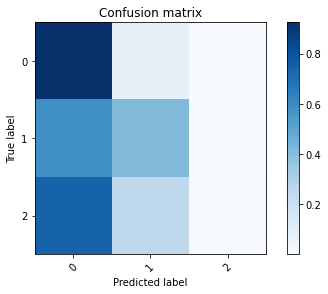

0.6904557179707652 RandomForestClassifier {'n_estimators': 30}


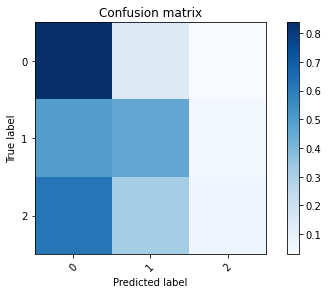

0.6552020636285468 LogisticRegression {'penalty': 'l2', 'solver': 'sag'}


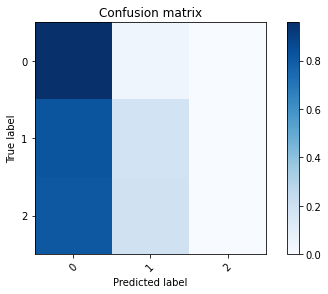

0.6517626827171109 MultinomialNB {'alpha': 5, 'fit_prior': True}


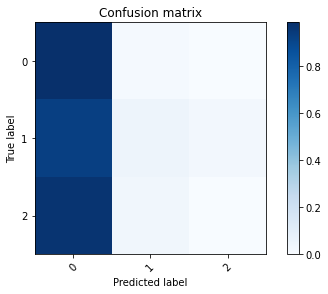

0.6371453138435081 KNeighborsClassifier {'n_neighbors': 5}


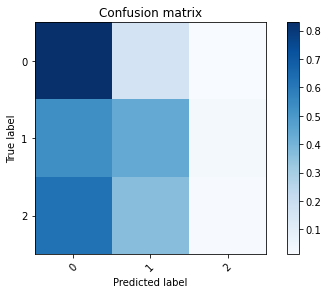

0.6388650042992261 SVC {'C': 10, 'kernel': 'rbf'}


[0.6904557179707652,
 0.6552020636285468,
 0.6517626827171109,
 0.6371453138435081,
 0.6388650042992261]

In [16]:
accs_c = []
for i,clf in enumerate(classifiers_c):
  acc = clf.test_and_plot(tst_vecs_c[i],tst_labels_c,class_num=3)
  print(acc,clf.classifier.__name__,clf.params)
  accs_c.append(acc)
  
accs_c

# Neural Nets

## Subtask A

### Reading data and cleaning

In [17]:
dr_nn = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','A')
data_nn,labels_nn = dr_nn.get_labelled_data()
data_nn,labels_nn = dr_nn.shuffle(data_nn,labels_nn,'random')

tr_data_nn,tst_data_nn,tr_labels_nn,tst_labels_nn = split(data_nn,labels_nn,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn = prp.clean(tr_data_nn)
tst_data_clean_nn = prp.clean(tst_data_nn)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn)

Reading Data: 13241it [00:00, 323567.37it/s]
Tokenization: 9268it [00:01, 6725.80it/s]0<?, ?it/s]
Stopwords Removal: 9268it [00:00, 80120.39it/s]2,  1.38s/it]
Lemmatization: 9268it [00:04, 2040.91it/s]<00:00,  1.57it/s]
Preprocessing: 100%|██████████| 3/3 [00:06<00:00,  2.01s/it]
Tokenization: 3972it [00:00, 6583.74it/s]0<?, ?it/s]
Stopwords Removal: 3972it [00:00, 78285.84it/s]1,  1.65it/s]
Lemmatization: 3972it [00:02, 1945.57it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Training LSTM

In [18]:
lstm = DeepLearner(tr_data_clean_nn,tr_labels_nn,vocab_length=vct.vocab_length,model_type='LSTM')
lstm.train(epochs=60)

/Users/claradelandre/Desktop/EPFL/MA2/DeepLearning/Projet/DeepL-Breakers/DeepLearning.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  )


Epoch 1/60, Loss: 0.5633
Epoch 2/60, Loss: 1.0176
Epoch 3/60, Loss: 0.6960
Epoch 4/60, Loss: 0.5561
Epoch 5/60, Loss: 0.5855
Epoch 6/60, Loss: 0.8133
Epoch 7/60, Loss: 0.6883
Epoch 8/60, Loss: 0.8133
Epoch 9/60, Loss: 0.8133
Epoch 10/60, Loss: 0.5633
Epoch 11/60, Loss: 0.5633
Epoch 12/60, Loss: 0.5633
Epoch 13/60, Loss: 0.8133
Epoch 14/60, Loss: 0.6883
Epoch 15/60, Loss: 0.6883
Epoch 16/60, Loss: 0.8133
Epoch 17/60, Loss: 0.6883
Epoch 18/60, Loss: 0.8133
Epoch 19/60, Loss: 0.4383
Epoch 20/60, Loss: 0.6883
Epoch 21/60, Loss: 0.6883
Epoch 22/60, Loss: 0.4383
Epoch 23/60, Loss: 0.4383
Epoch 24/60, Loss: 0.8133
Epoch 25/60, Loss: 0.4383
Epoch 26/60, Loss: 0.4383
Epoch 27/60, Loss: 0.6883
Epoch 28/60, Loss: 0.6883
Epoch 29/60, Loss: 0.5633
Epoch 30/60, Loss: 0.5633
Epoch 31/60, Loss: 0.5633
Epoch 32/60, Loss: 0.6883
Epoch 33/60, Loss: 0.8133
Epoch 34/60, Loss: 0.9383
Epoch 35/60, Loss: 0.5633
Epoch 36/60, Loss: 0.6883
Epoch 37/60, Loss: 0.5633
Epoch 38/60, Loss: 0.9383
Epoch 39/60, Loss: 0.

### Testing LSTM and plotting

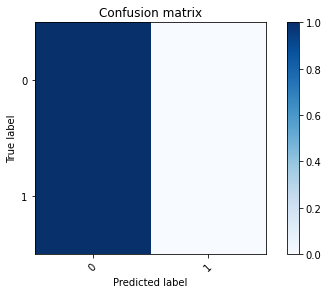

Test Loss: 0.6524, Accuracy: 66.09%
LSTM 0.6608761548995972


In [19]:
acc = lstm.test_and_plot(tst_data_clean_nn,tst_labels_nn)
print('LSTM',acc)

### Training CNN

In [20]:
cnn = DeepLearner(tr_data_clean_nn,tr_labels_nn,vocab_length=vct.vocab_length,model_type='CNN')
cnn.train(epochs=10)

/Users/claradelandre/Desktop/EPFL/MA2/DeepLearning/Projet/DeepL-Breakers/DeepLearning.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  )


Epoch 1/10, Loss: 0.6883
Epoch 2/10, Loss: 0.6883
Epoch 3/10, Loss: 1.0633
Epoch 4/10, Loss: 0.3133
Epoch 5/10, Loss: 0.6883
Epoch 6/10, Loss: 0.4383
Epoch 7/10, Loss: 0.8133
Epoch 8/10, Loss: 0.5633
Epoch 9/10, Loss: 0.5633
Epoch 10/10, Loss: 0.5633


### Testing CNN and plotting

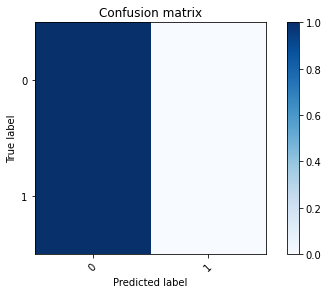

Test Loss: 0.6524, Accuracy: 66.09%
CNN 0.6608761548995972


In [21]:
acc = cnn.test_and_plot(tst_data_clean_nn,tst_labels_nn)
print('CNN',acc)

## Subtask B

### Reading data and cleaning

In [22]:
dr_nn_b = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','B')
data_nn_b,labels_nn_b = dr_nn_b.get_labelled_data()
data_nn_b,labels_nn_b = dr_nn_b.shuffle(data_nn_b,labels_nn_b,'random')

tr_data_nn_b,tst_data_nn_b,tr_labels_nn_b,tst_labels_nn_b = split(data_nn_b,labels_nn_b,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn_b = prp.clean(tr_data_nn_b)
tst_data_clean_nn_b = prp.clean(tst_data_nn_b)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn_b)

Reading Data: 13241it [00:00, 339205.62it/s]
Tokenization: 3080it [00:00, 6386.57it/s]0<?, ?it/s]
Stopwords Removal: 3080it [00:00, 80126.88it/s]0,  2.07it/s]
Lemmatization: 3080it [00:01, 1726.66it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]
Tokenization: 1320it [00:00, 6333.64it/s]0<?, ?it/s]
Stopwords Removal: 1320it [00:00, 76339.99it/s]0,  4.77it/s]
Lemmatization: 1320it [00:00, 1794.55it/s]
Preprocessing: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Training LSTM

In [23]:
lstm_b = DeepLearner(tr_data_clean_nn_b,tr_labels_nn_b,vocab_length=vct.vocab_length,model_type='LSTM')
lstm_b.train(epochs=60)

/Users/claradelandre/Desktop/EPFL/MA2/DeepLearning/Projet/DeepL-Breakers/DeepLearning.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  )


Epoch 1/60, Loss: 0.3689
Epoch 2/60, Loss: 0.4244
Epoch 3/60, Loss: 0.4244
Epoch 4/60, Loss: 0.4799
Epoch 5/60, Loss: 0.3688
Epoch 6/60, Loss: 0.4244
Epoch 7/60, Loss: 0.4799
Epoch 8/60, Loss: 0.3688
Epoch 9/60, Loss: 0.4244
Epoch 10/60, Loss: 0.4799
Epoch 11/60, Loss: 0.4244
Epoch 12/60, Loss: 0.3688
Epoch 13/60, Loss: 0.4244
Epoch 14/60, Loss: 0.4244
Epoch 15/60, Loss: 0.3688
Epoch 16/60, Loss: 0.3133
Epoch 17/60, Loss: 0.4244
Epoch 18/60, Loss: 0.4799
Epoch 19/60, Loss: 0.3688
Epoch 20/60, Loss: 0.3688
Epoch 21/60, Loss: 0.3688
Epoch 22/60, Loss: 0.4244
Epoch 23/60, Loss: 0.3688
Epoch 24/60, Loss: 0.3688
Epoch 25/60, Loss: 0.5910
Epoch 26/60, Loss: 0.4244
Epoch 27/60, Loss: 0.3688
Epoch 28/60, Loss: 0.4244
Epoch 29/60, Loss: 0.5355
Epoch 30/60, Loss: 0.5355
Epoch 31/60, Loss: 0.4799
Epoch 32/60, Loss: 0.5355
Epoch 33/60, Loss: 0.3133
Epoch 34/60, Loss: 0.4799
Epoch 35/60, Loss: 0.5355
Epoch 36/60, Loss: 0.3688
Epoch 37/60, Loss: 0.3688
Epoch 38/60, Loss: 0.5910
Epoch 39/60, Loss: 0.

### Testing LSTM and plotting

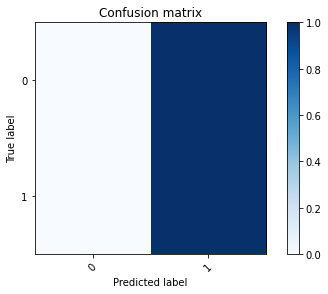

Test Loss: 0.4390, Accuracy: 87.42%
LSTM 0.8742424249649048


In [24]:
acc = lstm_b.test_and_plot(tst_data_clean_nn_b,tst_labels_nn_b)
print('LSTM',acc)

### Training CNN

In [25]:
cnn_b = DeepLearner(tr_data_clean_nn_b,tr_labels_nn_b,vocab_length=vct.vocab_length,model_type='CNN')
cnn_b.train(epochs=10)

/Users/claradelandre/Desktop/EPFL/MA2/DeepLearning/Projet/DeepL-Breakers/DeepLearning.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  )


Epoch 1/10, Loss: 0.4244
Epoch 2/10, Loss: 0.4244
Epoch 3/10, Loss: 0.3688
Epoch 4/10, Loss: 0.5910
Epoch 5/10, Loss: 0.3688
Epoch 6/10, Loss: 0.4244
Epoch 7/10, Loss: 0.4799
Epoch 8/10, Loss: 0.4244
Epoch 9/10, Loss: 0.4244
Epoch 10/10, Loss: 0.4799


### Testing CNN and plotting

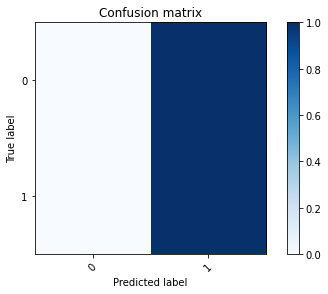

Test Loss: 0.4390, Accuracy: 87.42%
CNN 0.8742424249649048


In [26]:
acc = cnn_b.test_and_plot(tst_data_clean_nn_b,tst_labels_nn_b)
print('CNN',acc)

## Subtask C

### Reading data and cleaning

In [27]:
dr_nn_c = DataReader('./datasets/training-v1/offenseval-training-v1.tsv','C')
data_nn_c,labels_nn_c = dr_nn_c.get_labelled_data()
data_nn_c,labels_nn_c = dr_nn_c.shuffle(data_nn_c,labels_nn_c,'random')

tr_data_nn_c,tst_data_nn_c,tr_labels_nn_c,tst_labels_nn_c = split(data_nn_c,labels_nn_c,test_size=0.3)

prp = Preprocessor('remove_stopwords','lemmatize')
tr_data_clean_nn_c = prp.clean(tr_data_nn_c)
tst_data_clean_nn_c = prp.clean(tst_data_nn_c)

vct = Vectorizer('count')
vct.vectorize(tr_data_clean_nn_c)

Reading Data: 13241it [00:00, 316234.46it/s]
Tokenization: 2713it [00:00, 5918.68it/s]0<?, ?it/s]
Stopwords Removal: 2713it [00:00, 77352.86it/s]0,  2.17it/s]
Lemmatization: 2713it [00:01, 1740.96it/s]
Preprocessing: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
Tokenization: 1163it [00:00, 5997.23it/s]0<?, ?it/s]
Stopwords Removal: 1163it [00:00, 75550.22it/s]0,  5.11it/s]
Lemmatization: 1163it [00:00, 1799.23it/s]
Preprocessing: 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Training LSTM

In [28]:
lstm_c = DeepLearner(tr_data_clean_nn_c,tr_labels_nn_c,vocab_length=vct.vocab_length,model_type='LSTM')
lstm_c.train(epochs=60)

/Users/claradelandre/Desktop/EPFL/MA2/DeepLearning/Projet/DeepL-Breakers/DeepLearning.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  )


Epoch 1/60, Loss: 0.9511
Epoch 2/60, Loss: 0.9514
Epoch 3/60, Loss: 0.7229
Epoch 4/60, Loss: 0.9514
Epoch 5/60, Loss: 0.7514
Epoch 6/60, Loss: 0.8943
Epoch 7/60, Loss: 0.9800
Epoch 8/60, Loss: 0.9229
Epoch 9/60, Loss: 0.9229
Epoch 10/60, Loss: 0.8943
Epoch 11/60, Loss: 1.0086
Epoch 12/60, Loss: 0.8372
Epoch 13/60, Loss: 1.0086
Epoch 14/60, Loss: 0.9514
Epoch 15/60, Loss: 0.7800
Epoch 16/60, Loss: 0.9514
Epoch 17/60, Loss: 0.9514
Epoch 18/60, Loss: 1.0086
Epoch 19/60, Loss: 0.9800
Epoch 20/60, Loss: 0.8657
Epoch 21/60, Loss: 0.8657
Epoch 22/60, Loss: 0.8086
Epoch 23/60, Loss: 0.8657
Epoch 24/60, Loss: 0.9229
Epoch 25/60, Loss: 0.9229
Epoch 26/60, Loss: 0.9514
Epoch 27/60, Loss: 0.8943
Epoch 28/60, Loss: 0.9514
Epoch 29/60, Loss: 0.8657
Epoch 30/60, Loss: 0.8657
Epoch 31/60, Loss: 1.0086
Epoch 32/60, Loss: 0.8372
Epoch 33/60, Loss: 0.9800
Epoch 34/60, Loss: 1.0086
Epoch 35/60, Loss: 0.8657
Epoch 36/60, Loss: 0.8086
Epoch 37/60, Loss: 1.0086
Epoch 38/60, Loss: 0.9514
Epoch 39/60, Loss: 0.

### Testing LSTM and plotting

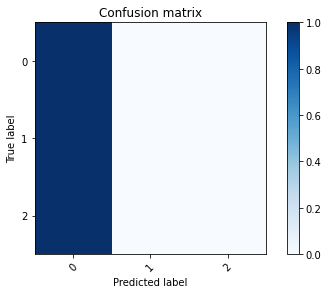

Test Loss: 0.9453, Accuracy: 60.62%
LSTM 0.6061908602714539


In [29]:
acc = lstm_c.test_and_plot(tst_data_clean_nn_c,tst_labels_nn_c,3)
print('LSTM',acc)

### Training CNN

In [30]:
cnn_c = DeepLearner(tr_data_clean_nn_c,tr_labels_nn_c,vocab_length=vct.vocab_length,model_type='CNN')
cnn_c.train(epochs=10)

/Users/claradelandre/Desktop/EPFL/MA2/DeepLearning/Projet/DeepL-Breakers/DeepLearning.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  )


Epoch 1/10, Loss: 1.0943
Epoch 2/10, Loss: 0.8372
Epoch 3/10, Loss: 0.8657
Epoch 4/10, Loss: 0.9229
Epoch 5/10, Loss: 0.9800
Epoch 6/10, Loss: 0.9514
Epoch 7/10, Loss: 0.9229
Epoch 8/10, Loss: 0.8943
Epoch 9/10, Loss: 0.8657
Epoch 10/10, Loss: 0.8657


### Testing CNN and plotting

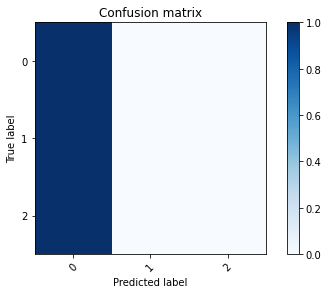

Test Loss: 0.9453, Accuracy: 60.62%
CNN 0.6061908602714539


In [31]:
acc = cnn_c.test_and_plot(tst_data_clean_nn_c,tst_labels_nn_c,3)
print('CNN',acc)

# SAVE THE MODELS

In [ ]:
for i, clf in enumerate(classifiers):
    clf.save(f"saved_models/subtaskA_model_{i}.joblib")

for i, clf in enumerate(classifiers_b):
    clf.save(f"saved_models/subtaskB_model_{i}.joblib")

for i, clf in enumerate(classifiers_c):
    clf.save(f"saved_models/subtaskC_model_{i}.joblib")

lstm.save("saved_models/subtaskA_lstm.pth")
cnn.save("saved_models/subtaskA_cnn.pth")

lstm_b.save("saved_models/subtaskB_lstm.pth")
cnn_b.save("saved_models/subtaskB_cnn.pth")

lstm_c.save("saved_models/subtaskC_lstm.pth")
cnn_c.save("saved_models/subtaskC_cnn.pth")